# Load data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/auto_data1/calibration_dof_to_step.csv', sep=',',decimal='.')
df

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,angle_undist,angle_dist_warp,angle_undist_warp,point_x,point_y,incr_x,incr_y,steps1,steps2,angle
0,0,17,img_0,1379.5,2236.5,1396.0,2211.0,1260.7062,1823.64970,1270.2755,...,73.073723,72.321121,72.494843,0.25,0.333333,0.25,0.333333,-213,1998,155.6862
1,1,21,img_1,2517.0,2234.0,2523.0,2205.0,2404.3930,1811.74230,2401.4902,...,-99.496105,-99.960548,-99.953033,0.50,0.333333,0.25,0.000000,-1105,1105,352.4506
2,2,20,img_2,3650.5,2239.0,3642.5,2211.0,3534.5100,1807.49350,3519.4976,...,24.035767,23.642834,23.688282,0.75,0.333333,0.25,0.000000,-1105,1105,113.7214
3,3,18,img_3,1374.0,1320.0,1390.5,1305.0,1246.2526,895.08470,1255.4397,...,NaN,NaN,NaN,0.25,0.666667,-0.50,0.333333,3104,-1319,174.7001
4,4,15,img_4,2510.5,1312.5,2517.5,1299.5,2390.4072,882.05410,2388.2563,...,-122.599206,-122.718506,-122.930870,0.50,0.666667,0.25,0.000000,-1105,1105,328.2257
5,5,13,img_5,3642.5,1315.0,3634.5,1301.5,3520.5137,879.21405,3505.3132,...,169.928145,169.537872,169.556625,0.75,0.666667,0.25,0.000000,-1105,1105,258.9301


# Data preprocessing

In [2]:
df['cos']=np.cos(df['angle']*np.pi/180)
df['sin']=np.sin(df['angle']*np.pi/180)

In [3]:
x = df[['target_x_undist_warp', 'target_y_undist_warp', 'cos', 'sin']]
y = df[['point_x','point_y']]

In [8]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1, stratify=df['target_aruco'])

# Linear regressor

In [4]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x,y)

y_pred=model.predict(x)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y,y_pred,squared=False),r2_score(y,y_pred))

4.96861988306979e-05 0.999999908524479


Text(0.5, 1.0, 'true vs predicted')

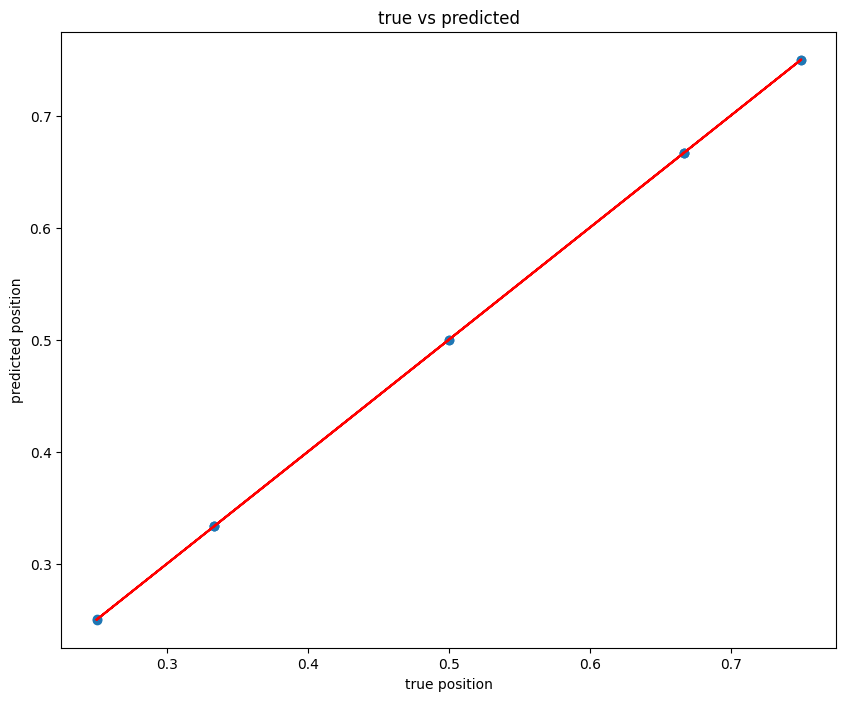

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

In [15]:
from pool.calibration import InverseKinematics
ik = InverseKinematics()
steps1,steps2=ik.cm_to_steps(y_pred[:,0],y_pred[:,1])

In [16]:
absolute_steps1=df['steps1'].cumsum()
absolute_steps2=df['steps2'].cumsum()

In [17]:
error1=np.abs(absolute_steps1-steps1)
error2=np.abs(absolute_steps2-steps2)
print(error1, error2)

0    1.329232
1    1.282659
2    2.770798
3    2.237662
4    4.223967
5    4.598767
Name: steps1, dtype: float64 0    0.458601
1    0.587826
2    1.981276
3    0.755469
4    2.559284
5    3.035617
Name: steps2, dtype: float64


# Save model

In [7]:
import os
import joblib
from pool.utils import Params

params=Params()
joblib.dump(model, os.path.join(params.PATH_REPO, 'data', "inverse_kinematics.pkl"))

['C:\\Users\\usuario\\Desktop\\TFM\\automatic pool\\software\\repo\\data\\inverse_kinematics.pkl']